In [12]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

import pandas as pd

import matplotlib.pyplot as plt

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [2]:
data=pd.read_csv('pokemon.csv')
data

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard
...,...,...,...,...
804,stakataka,Rock,Steel,NaN
805,blacephalon,Fire,Ghost,NaN
806,zeraora,Electric,NaN,NaN
807,meltan,Steel,NaN,NaN


In [3]:
data.value_counts('Type1')

Type1
Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Fighting     29
Dark         29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: count, dtype: int64

In [4]:
data=data[data.Type1.isin(['Water','Grass','Fire'])][['Name','Type1']]
data

,Name,Type1
0,bulbasaur,Grass
1,ivysaur,Grass
2,venusaur,Grass
3,charmander,Fire
4,charmeleon,Fire
...,...,...
778,bruxish,Water
786,tapu-bulu,Grass
787,tapu-fini,Water
797,kartana,Grass


In [5]:
print('Data shape',data.shape)
print('Number of unique names',data.Name.nunique())

Data shape (245, 2)
Number of unique names 245


In [6]:
import cv2

image_df=[]

path_start='D:\SIS420\SIS420\Laboratorio3\images\images'
for filename in os.listdir(path_start):
    if filename.endswith(".png"):
        image_name = filename.split('.')[0]  
        
        image = cv2.imread(os.path.join(path_start, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
#         image_df=image_df.append({'Name':image_name,'img':np.array(image)},ignore_index=True)
#         image_df=pd.concat
        image_df.append({'Name':image_name,'img':np.array(image)})

image_df=pd.DataFrame(image_df)

In [7]:
data=data.merge(image_df,how='inner', on='Name')

In [8]:
data.img.info()


<class 'pandas.core.series.Series'>
RangeIndex: 245 entries, 0 to 244
Series name: img
Non-Null Count  Dtype 
--------------  ----- 
245 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [9]:
data.value_counts('Type1')

Type1
Water    114
Grass     78
Fire      53
Name: count, dtype: int64

In [10]:
data.loc[0].img.shape

(120, 120, 3)

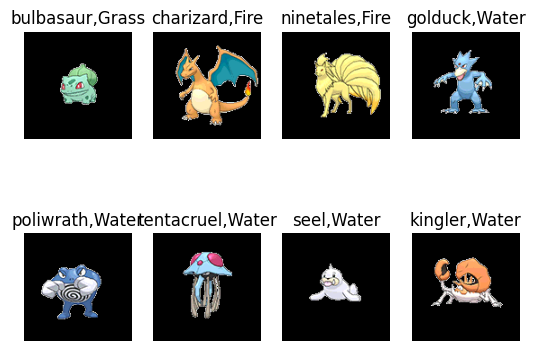

In [13]:
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(data.loc[i*5].img)
    plt.title(f"{data.loc[i*5].Name},{data.loc[i*5].Type1}")
    plt.axis('off')
plt.show()